In [ ]:

import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Đường dẫn tới file JSON
path_raw_data = '../data/interim/batdongsancomvn/chungcu/interim_merged_chungcu.json'
# path_raw_data = 'preprocess_data1.json'

try:
    print("Start reading file...")
    # Mở và đọc file JSON
    with open(path_raw_data, 'r', encoding='utf-8') as file:
        raw_data = json.load(file)  # Đọc và chuyển đổi nội dung JSON
except FileNotFoundError:
    print(f"Error: File '{path_raw_data}' không tồn tại.")
except json.JSONDecodeError:
    print(f"Error: File '{path_raw_data}' không đúng định dạng JSON.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")

# print(raw_data)


data = raw_data


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Start reading file...


In [2]:
def count_keys_in_objects(json_objects, key_list):
    key_count = {key: 0 for key in key_list}
    
    for obj in json_objects:
        if isinstance(obj, dict):
            for key in key_list:
                if key in obj:
                    key_count[key] += 1
    
    return key_count

# List of keys to check
key_list = [
    "title",
    "url",
    "location",
    "area",
    "price",
    "house_direction",
    "balcony_direction",
    "bedrooms",
    "toilets",
    "legal_status",
    "furniture",
    "latitude",
    "longitude"
]



key_counts = count_keys_in_objects(data, key_list)
for item in key_counts:
    print(f"{item}: {key_counts[item]}/{len(data)}")



title: 15002/15002
url: 15002/15002
location: 15002/15002
area: 15002/15002
price: 15002/15002
house_direction: 0/15002
balcony_direction: 0/15002
bedrooms: 15002/15002
toilets: 15002/15002
legal_status: 15002/15002
furniture: 15002/15002
latitude: 15002/15002
longitude: 15002/15002


Chuẩn hoá dữ liệu về vị trí 

In [3]:
def remove_hanoi_from_location(data):
    for entry in data:
        if "location" in entry and isinstance(entry["location"], str):
            entry["location"] = entry["location"].replace(", Hà Nội", "").strip()  # Loại bỏ ", Hà Nội" và xóa khoảng trắng dư thừa
remove_hanoi_from_location(data)


                               Visualising Categorical Features:                                


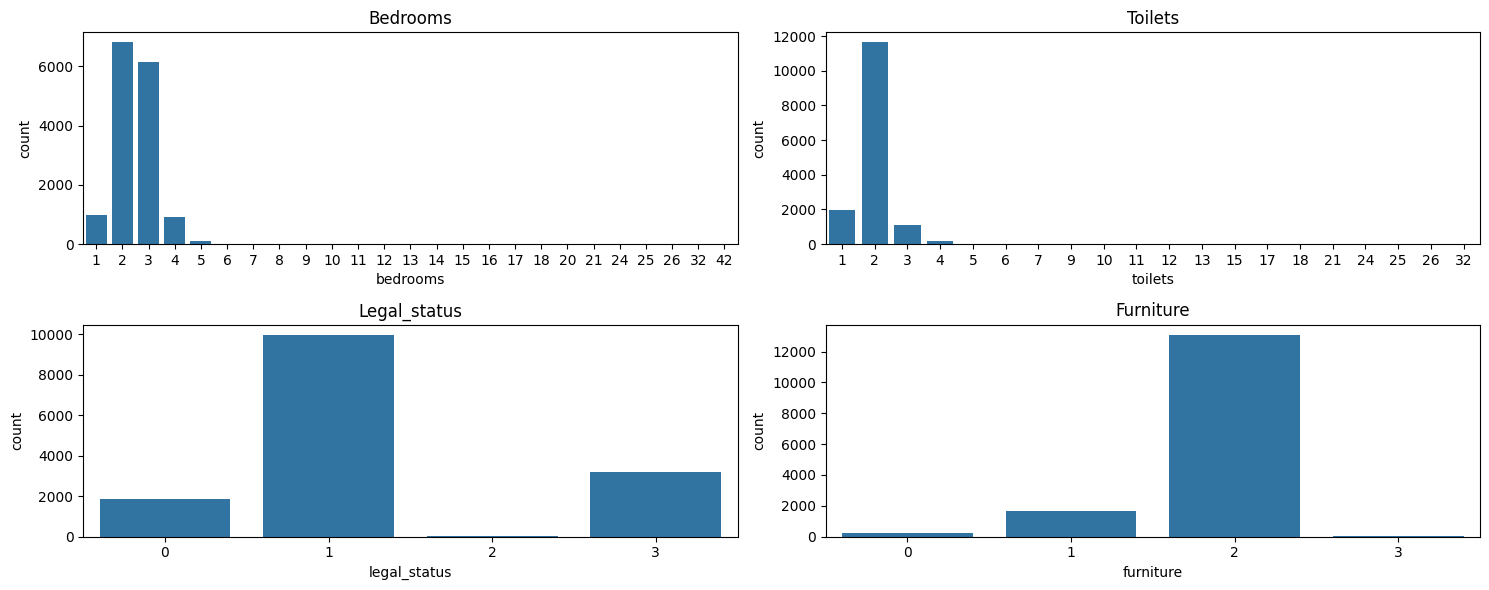

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define categorical features in your dataset
cf = ['bedrooms', 'toilets', 'legal_status', 'furniture']
df = pd.DataFrame(data)
print('\033[1mVisualising Categorical Features:'.center(100))

n = 2  # Adjusting to have 2 columns in each row for better readability
plt.figure(figsize=[15, 3 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf) / n), n, i + 1)
    sns.countplot(data=df, x=cf[i])
    plt.title(cf[i].capitalize())

plt.tight_layout()
plt.show()

CLUSTERING DATA 

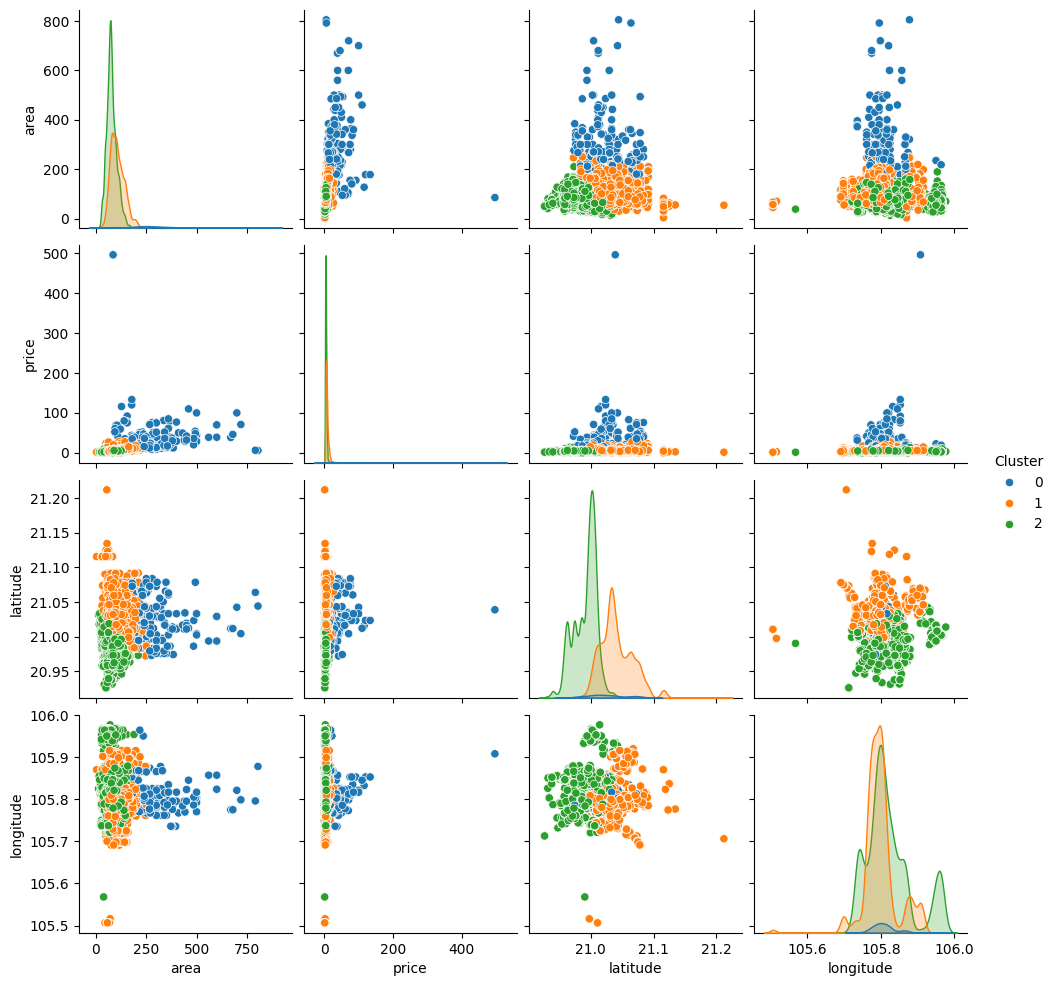

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu (giả sử data đã được định nghĩa)
df = pd.DataFrame(data)

# Loại bỏ các hàng có giá trị 'deal' trong cột 'price'
df = df[df['price'] != 'deal']

# Lựa chọn các đặc trưng để phân cụm
features = ["area", "price", "latitude", "longitude"]
df = df.dropna(subset=features)
X = df[features]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Số cụm có thể thay đổi
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Thiết lập bảng màu rõ ràng
palette = sns.color_palette("tab10", n_colors=3)

# Visualize clusters với bảng màu tùy chỉnh
sns.pairplot(df, hue='Cluster', vars=features, palette=palette)
plt.show()

SCATTERPLOT MATRIX

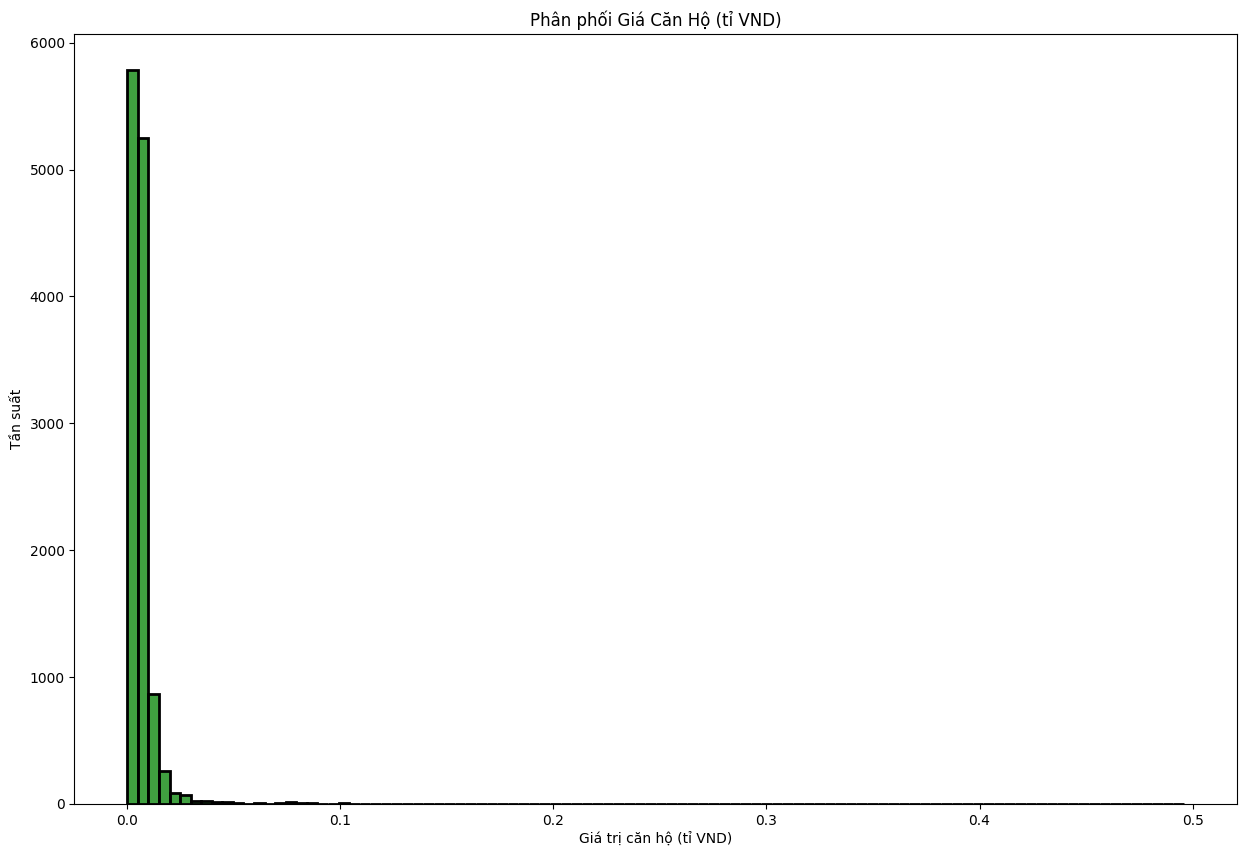

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
# Chuyển đổi dữ liệu thành DataFrame
# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Loại bỏ các hàng có giá trị NaN trong cột 'price'
df = df.dropna(subset=['price'])
# Lọc các giá trị 'price' dưới 100,000 triệu VND (tương đương dưới 100 tỷ VND)
# df = df[df['price'] <= 100000]
df['price'] = df['price'] / 1000
# print(df['price'])
# Biến đổi price về giá trị logarit 
# df['price'] = df['price'].apply(lambda x: np.log(x) if x > 0 else 0)

# Vẽ biểu đồ phân phối giá trị của cột 'price'
plt.figure(figsize=[15, 10])
sns.histplot(df['price'], color='g', edgecolor="black", linewidth=2, bins=100)
plt.title('Phân phối Giá Căn Hộ (tỉ VND)')
plt.xlabel('Giá trị căn hộ (tỉ VND)')
plt.ylabel('Tần suất')
plt.show()

Biểu đồ phân tán (Scatter Plot)
Biểu đồ này được sử dụng để phân tích mối quan hệ giữa diện tích căn hộ và giá trên m². Điều này giúp kiểm tra xem liệu diện tích có ảnh hưởng đến giá bán của căn hộ hay không.


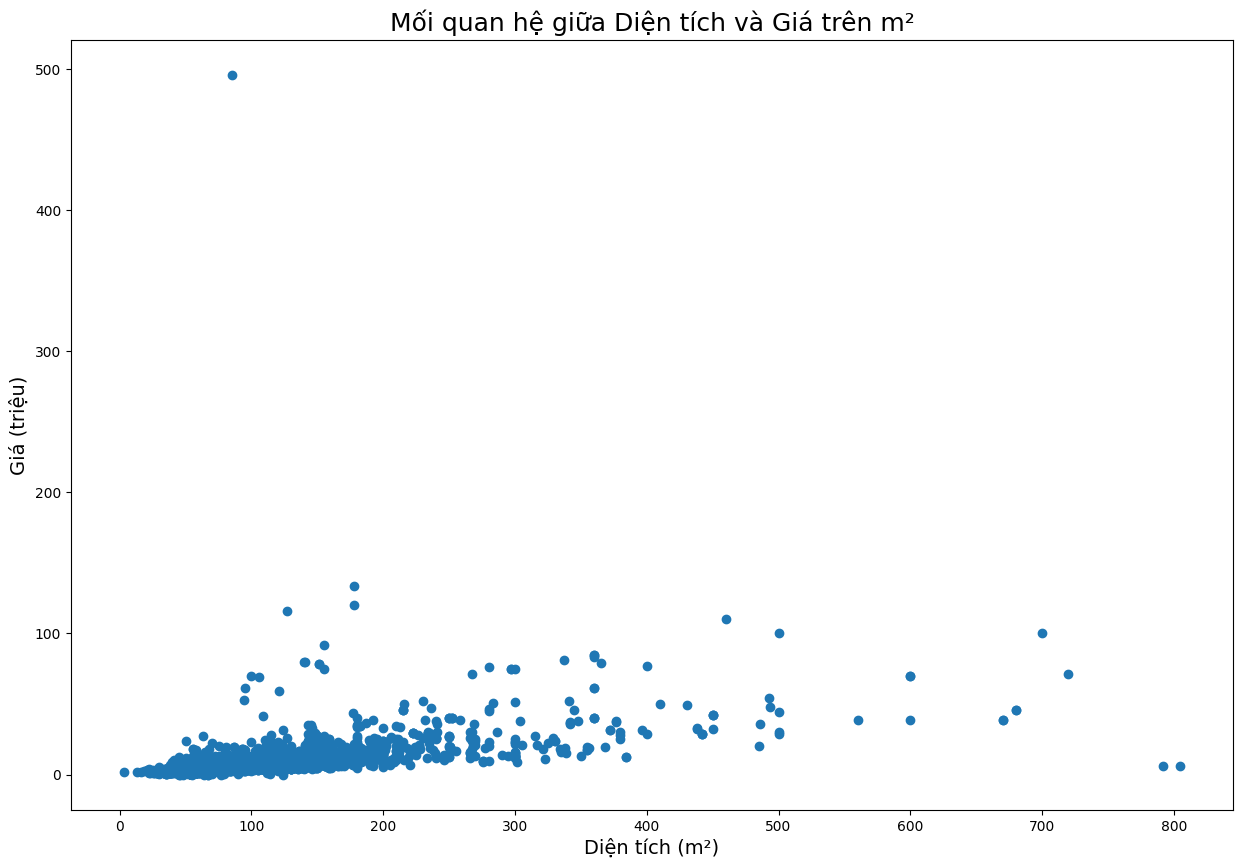

12417


In [7]:
# Loại bỏ các mục không có giá trị giá tiền (sau khi đã xử lý)
filtered_data = [d for d in data if isinstance(d.get("price"), (int, float))]

# Vẽ biểu đồ scatter
x = [d.get("area") for d in filtered_data]
y = [d.get("price") for d in filtered_data]

# Tăng kích thước biểu đồ
plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.title('Mối quan hệ giữa Diện tích và Giá trên m²', fontsize=18)
plt.xlabel('Diện tích (m²)', fontsize=14)
plt.ylabel('Giá (triệu)', fontsize=14)
plt.show()

print(len(filtered_data))

 Biểu đồ cột (Bar Chart)

Biểu đồ cột được sử dụng để so sánh giá trung bình trên m² giữa các địa điểm khác nhau 


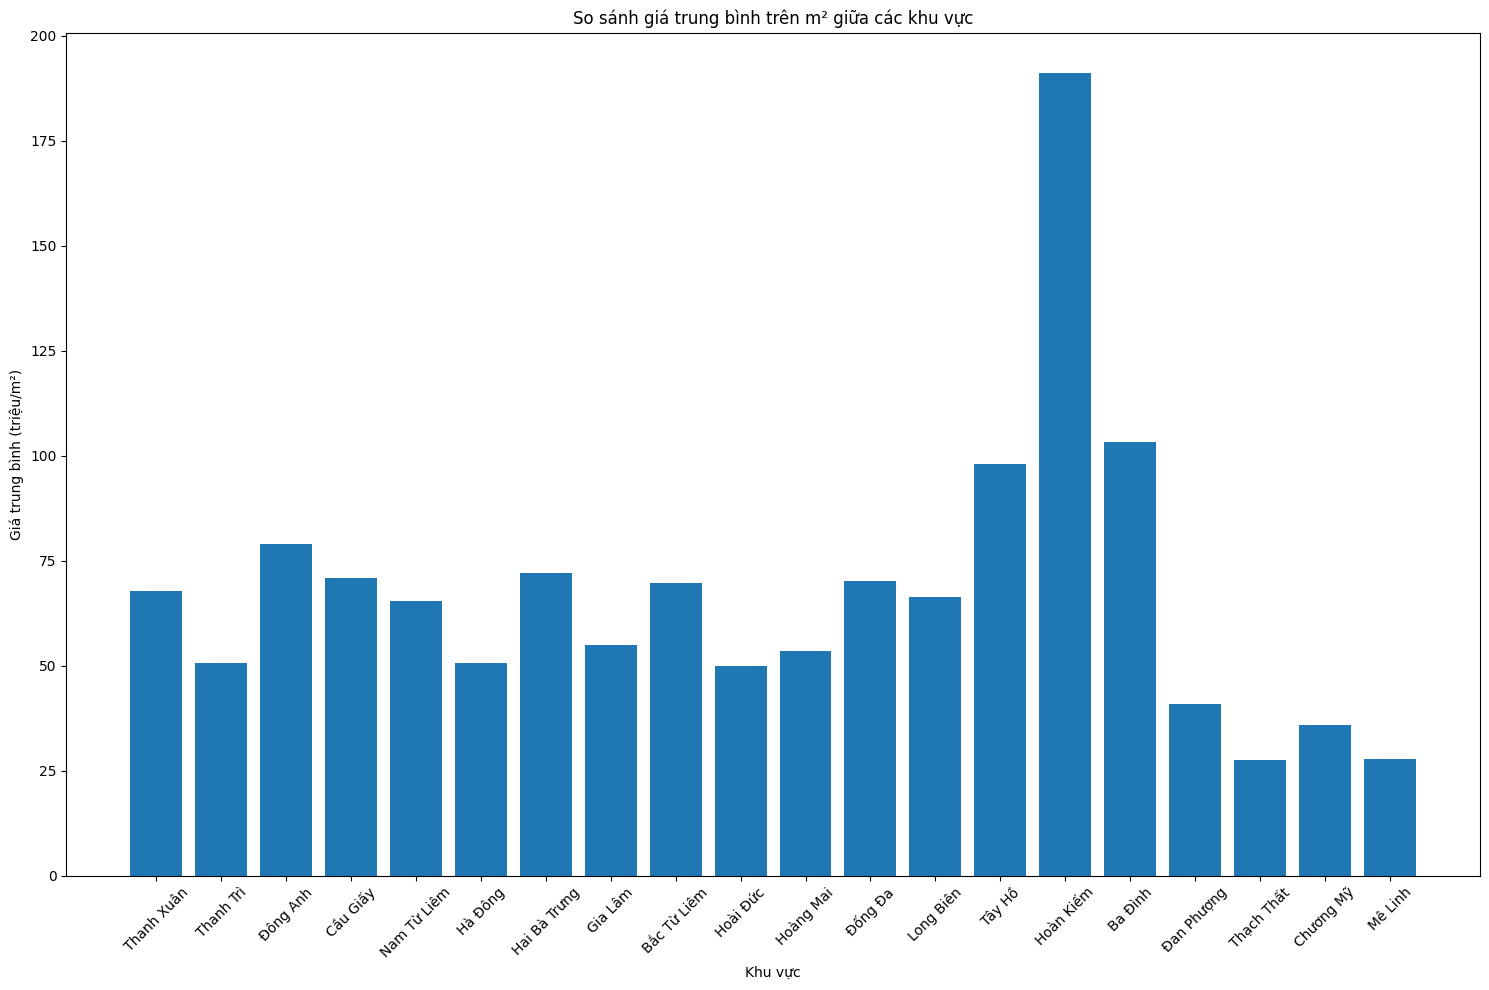

In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Dictionary to store total price and count for each location
location_data = defaultdict(lambda: {"total_price_square": 0, "count": 0})
for entry in data:
    if entry["price"]!="deal":
        entry["price_square"] = entry["price"] / entry["area"] *1000
        
# Process each entry in the data
for entry in data:
    location = entry.get("location")
    # Check if location exists and price_square is available and not "deal"
    if location is not None and "price_square" in entry and entry["price_square"] != "deal":
        # Convert price_square to float
        price_square = float(entry["price_square"])  
        location_data[location]["total_price_square"] += price_square
        location_data[location]["count"] += 1

# Calculate average price per m² for each location
avg_price_per_m2 = {}
for location, values in location_data.items():
    if values["count"] > 0:
        avg_price_per_m2[location] = values["total_price_square"] / values["count"]

# Prepare data for plotting
locations = list(avg_price_per_m2.keys())
avg_prices = list(avg_price_per_m2.values())
# Create bar chart
plt.figure(figsize=(15, 10))
plt.bar(locations, avg_prices)
plt.title('So sánh giá trung bình trên m² giữa các khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Giá trung bình (triệu/m²)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better fit
plt.show()


 Biểu đồ hộp (Box Plot)

Biểu đồ hộp hiển thị phân phối diện tích căn hộ giữa các khu vực khác nhau. Điều này giúp kiểm tra sự khác biệt về diện tích căn hộ giữa các khu vực.


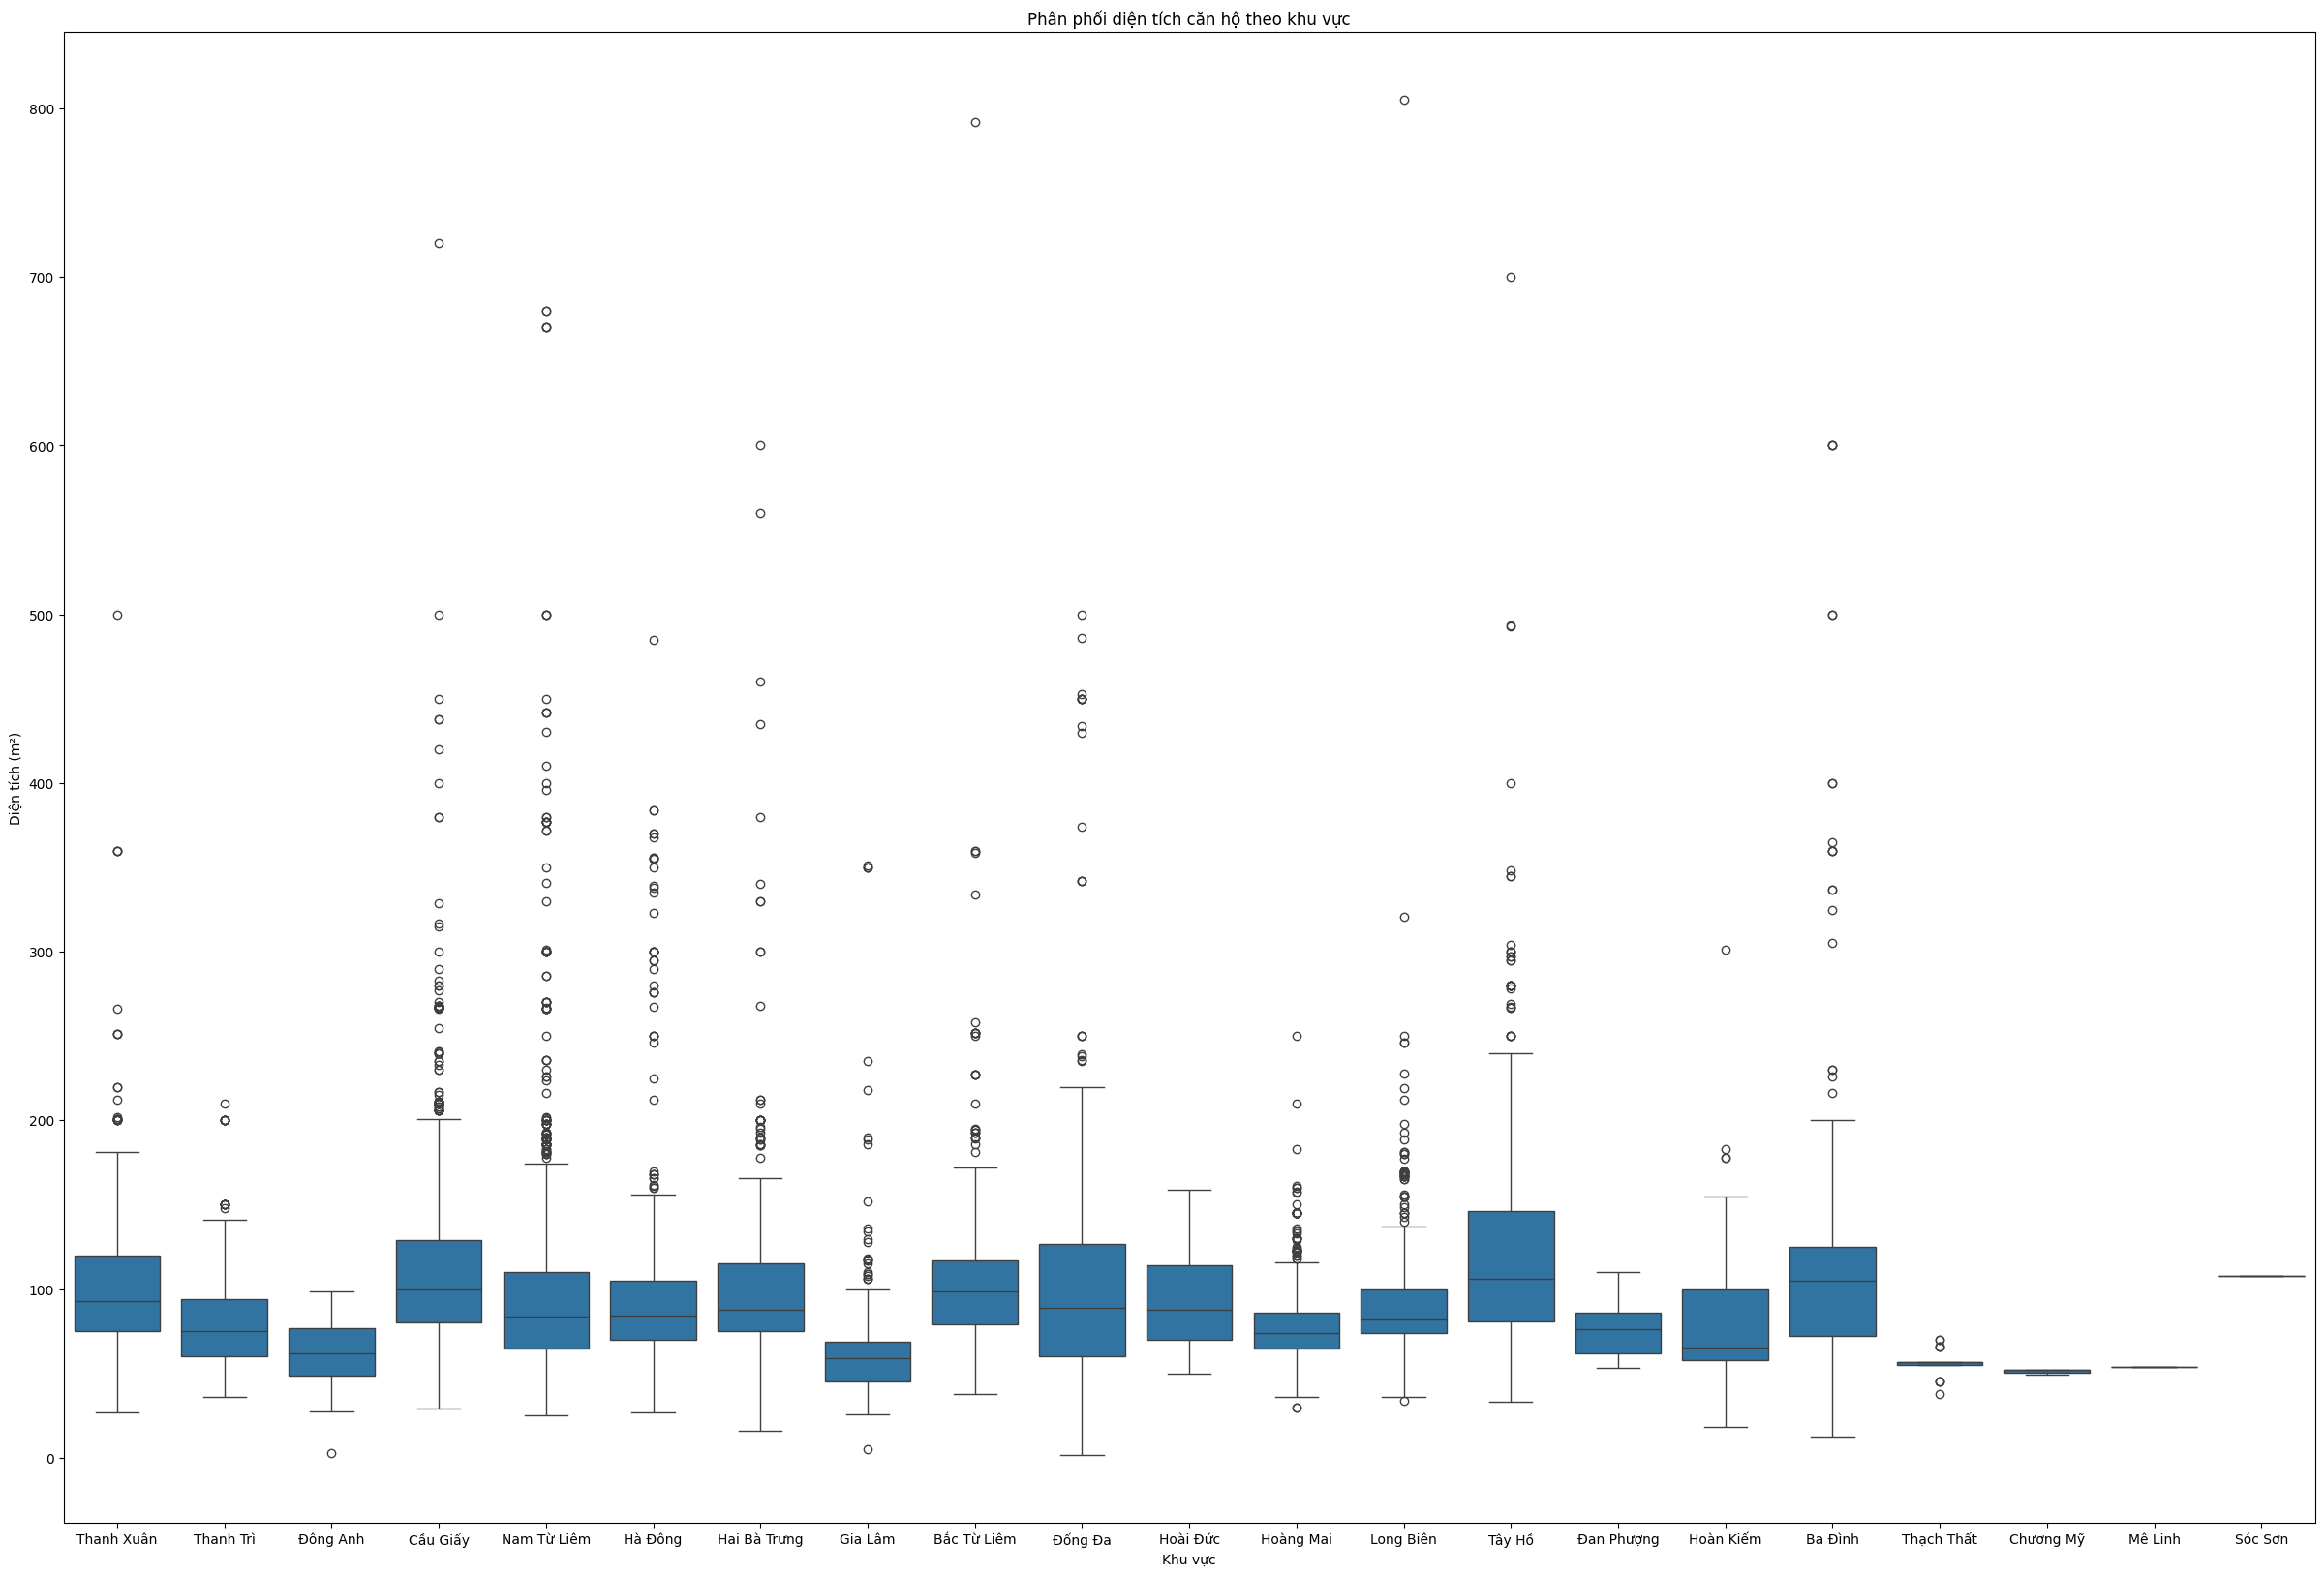

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from the data
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(30, 20))

# Create a boxplot
sns.boxplot(x='location', y='area', data=df)

# Add titles and labels
plt.title('Phân phối diện tích căn hộ theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Diện tích (m²)')

# Show the plot
plt.show()



Biểu đồ phân phối (Histogram)

Biểu đồ phân phối hiển thị sự phân bổ diện tích của tất cả các căn hộ. Điều này giúp xác định phân phối của diện tích căn hộ trong tập dữ liệu.

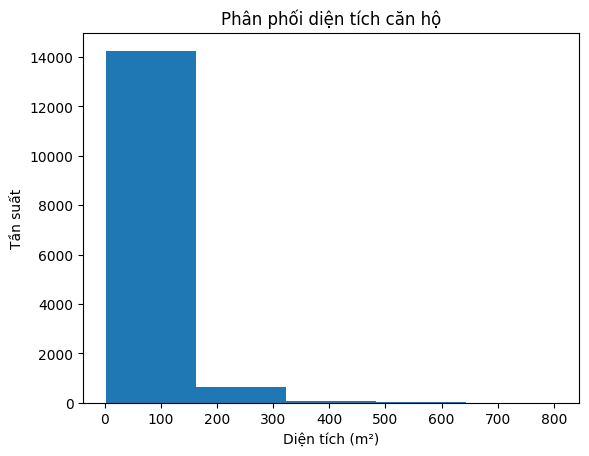

In [10]:
import matplotlib.pyplot as plt

# Dữ liệu diện tích
area_data = []
for entry in data:
    if "area" in entry:
        area_data.append(entry["area"])

plt.hist(area_data, bins=5)
plt.title('Phân phối diện tích căn hộ')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Tần suất')
plt.show()

- Giá trên m² có tương quan với diện tích căn hộ không? (sử dụng scatter plot để kiểm tra).
- Sự phân bố diện tích căn hộ giữa các khu vực có khác biệt không? (sử dụng box plot).
- vực nào có giá trung bình trên m² cao nhất? (sử dụng bar chart để so sánh giá trung bình).
- Phân phối diện tích căn hộ trông như thế nào? Liệu có bất kỳ sự thiên lệch nào trong dữ liệu diện tích? (sử dụng histogram).
- khu vực nào có giá trị bất thường không? (xem xét các giá trị trong box plot và scatter plot).


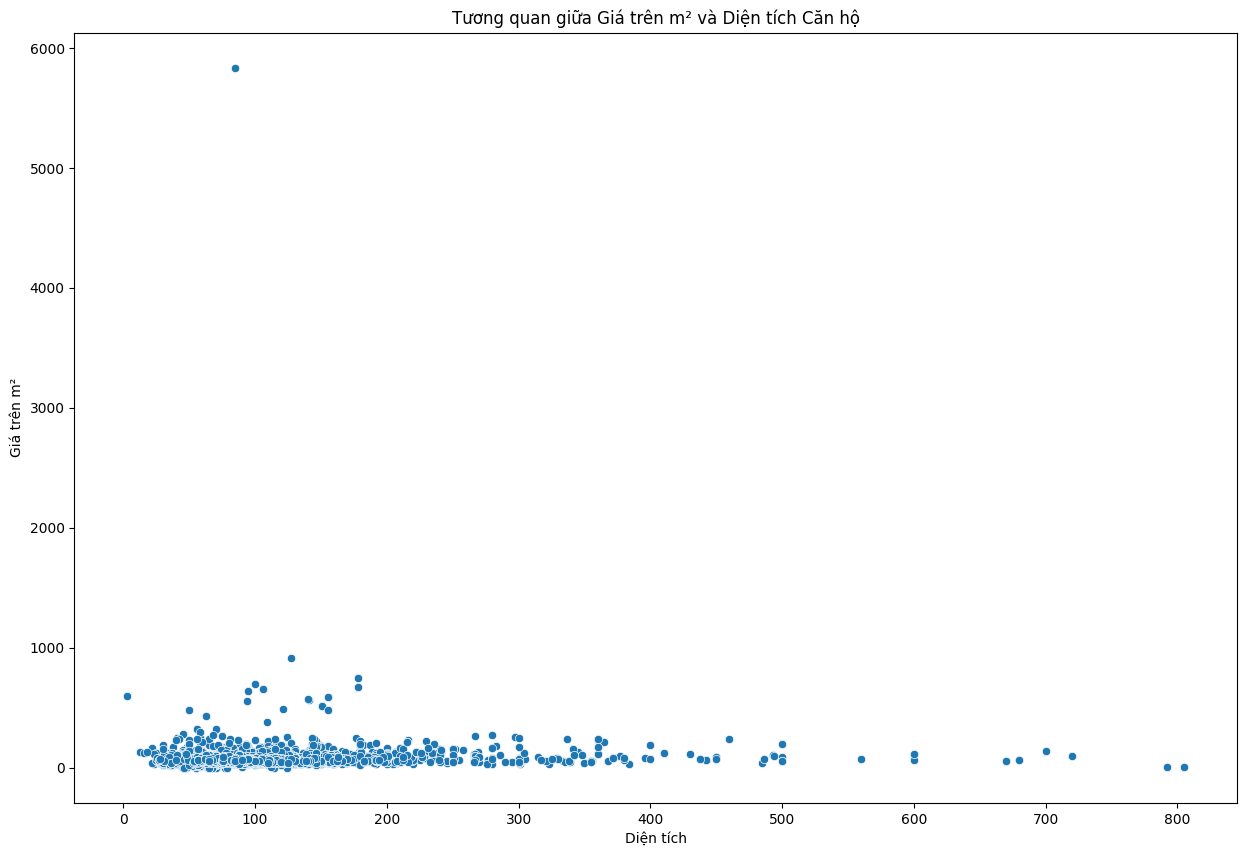

In [11]:
# Thay thế các giá trị không phải số bằng NaN và sau đó loại bỏ chúng
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price_square'] = pd.to_numeric(df['price_square'], errors='coerce')

# Loại bỏ các hàng có giá trị NaN (có nghĩa là các giá trị không phải số ban đầu)
df = df.dropna(subset=['area', 'price_square'])

# Vẽ biểu đồ sau khi xử lý
plt.figure(figsize=(15, 10))
sns.scatterplot(x='area', y='price_square', data=df)

# Thêm tiêu đề và nhãn
plt.title('Tương quan giữa Giá trên m² và Diện tích Căn hộ')
plt.xlabel('Diện tích')
plt.ylabel('Giá trên m²')
plt.show()

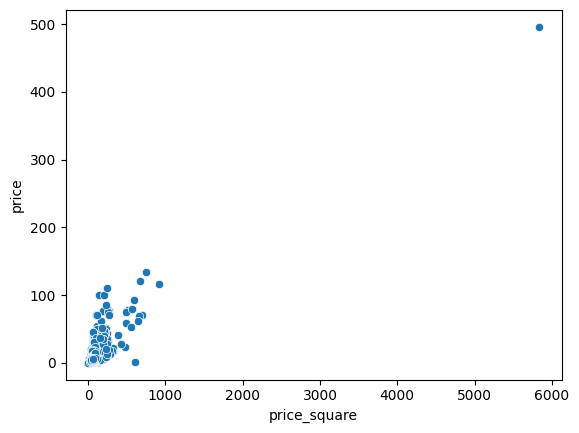

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['price_square'], y=df['price'])
plt.show()

In [13]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# 
# # Giả sử `data` là một danh sách các từ điển chứa `longitude` và `latitude`
# 
# 
# # Chuyển đổi `data` thành một DataFrame của Pandas
# df = pd.DataFrame(data)
# 
# # Chuẩn hóa kinh độ và vĩ độ
# scaler = MinMaxScaler()
# df[['longitude', 'latitude']] = scaler.fit_transform(df[['longitude', 'latitude']])
# 
# # Cập nhật lại `data` sau khi chuẩn hóa
# data = df.to_dict(orient="records")
# 
# # In các giá trị chuẩn hóa
# for entry in data:
#     print(entry['longitude'], entry['latitude'])

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# 
# # Chuẩn hóa kinh độ và vĩ độ
# scaler = MinMaxScaler()
# data[['longitude', 'latitude']] = scaler.fit_transform(data[['longitude', 'latitude']])

In [15]:
# import requests
# import time
# 
# def get_location_from_coordinates(latitude, longitude):
#     """
#     Hàm lấy vị trí địa lý từ tọa độ latitude và longitude bằng cách sử dụng dịch vụ Geocoding API.
#     Args:
#         latitude (float): Vĩ độ.
#         longitude (float): Kinh độ.
#     Returns:
#         str: Địa chỉ vị trí tương ứng với tọa độ.
#     """
#     url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}&zoom=18&addressdetails=1"
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
#     }
# 
#     try:
#         response = requests.get(url, headers=headers)
#         if response.status_code == 200:
#             data = response.json()
#             address = data.get('display_name', 'Không tìm thấy địa chỉ')
#             return address
#         else:
#             print(f"Lỗi kết nối: {response.status_code} - {response.reason}")
#             return 'Không thể lấy địa chỉ, lỗi kết nối.'
#     except requests.exceptions.RequestException as e:
#         print(f"Lỗi yêu cầu: {e}")
#         return 'Không thể lấy địa chỉ, lỗi kết nối.'
# 
# # Lấy địa chỉ cho mỗi mục trong data
# for entry in data[:100]:
#     latitude = entry.get("latitude")
#     longitude = entry.get("longitude")
#     if latitude is not None and longitude is not None:
#         location = get_location_from_coordinates(latitude, longitude)
#         print("________________")
#         print("Vị trí:", latitude, longitude)
#         print("Địa chỉ vị trí:", location)
#         print("________________________")
#         time.sleep(1)  # Nghỉ 1 giây giữa các yêu cầu để tránh bị giới hạn